# Multi-axis figures: advanced methods 

The `plt.plot()` way of making multi-panel (`axes`) figures is great for simple figures, consisting of anything from 1 panel figures to a 2x2 panel figure or so, where each panel is the same size.

For more complicated figures, however, there are a few other ways to add multiple subplots to our figures that allow us more flexibility in terms of the sizes and layout of our subplots.

In this tutorial, we will cover two of primary methods, which are using

- `plt.subplots()` (note the 's' - `plt.subplots()` is different than `plt.subplot()`!), 
- a sub-plot mosaic (`subplot_mosaic()`), 

We'll also briefly describe the low-level method of using a "grid specification" (optional)

### as always, let's import our libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Adding subplots with `subplots()`

The "go to" alternative to `plt.subplot()` for figures with a simple grid of sub-plots with same size is `plt.subplots()`. This makes all of our subplots in one command, and gives us `axes` objects that we can use to do our plotting.

Run the following code:

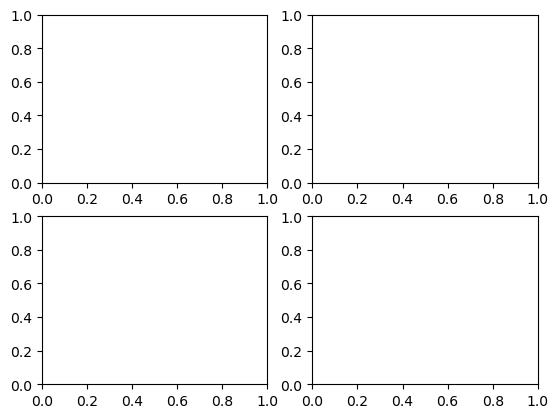

In [8]:
fig, axs = plt.subplots(ncols=2, nrows=2)

What has it done?

Notice that, in addition to making a 2x2 grid of axes, its return values have been assigned to `fig` and `axs` - let's look at these.

The first, `fig`, refers to the entire figure, and we can use it to do figure level stuff, like set the overall background color.

Now let's look at `axs`:

In [9]:
axs

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

Interesting, `axs` is an array! Like any other array, it has cells but, in this case, the cells contain the names of our `axes` objects. So if we wanted to do some plotting in the upper left cell, we would do `axs[0,0].plot(...)`, etc.

##### Note: 
`fig` and `axs` are just variable names, and you can use whatever names you wish. Just like with `np` and `plt`, however, coders generally use `"fig"` for the figure, `"ax"` for a single `axes`, and `"axs"` for multiple `axes` objects.

Let's make some stuff to plot:

In [10]:
x = np.linspace(-10, 10, 10)
y1 = x
y2 = x**2
y3 = x**3
y4 = x**4

And plot:

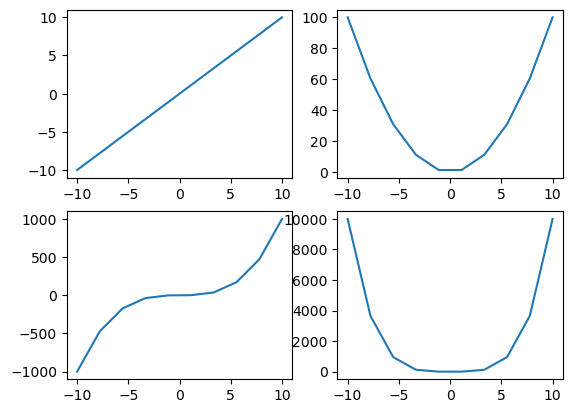

In [11]:
fig, axs = plt.subplots(ncols=2, nrows=2)

axs[0, 0].plot(x, y1);
axs[0, 1].plot(x, y2);
axs[1, 0].plot(x, y3);
axs[1, 1].plot(x, y4);

So what advantages does this have over using `plt.subplot()`? We can see two right now. 

First, we don't have to re-specify the same grid every time we plot. 

Second, and more importantly, *we address the `axes` exactly as they are laid out in the figure* - we refer to each individual `axes` by it's location in the figure.

A little pair of `for` loops will illustrate this nicely. We'll loop through the rows and columns, and put an annotation on each `axes` labeling it. Run the code below, and then *make sure you understand how the indexing is working before moving on*.

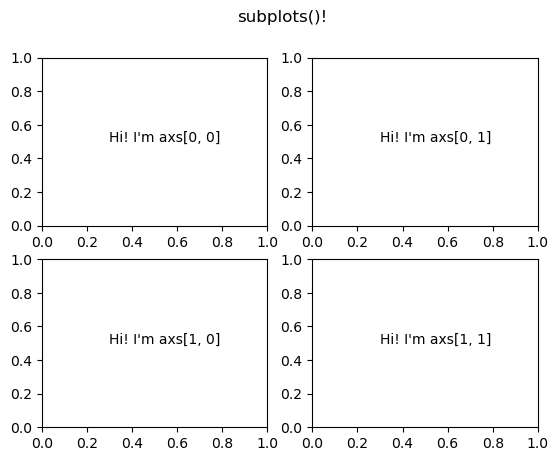

In [12]:
fig, axs = plt.subplots(ncols=2, nrows=2)

for row in range(2):
    for col in range(2):
        axs[row, col].text(0.3, 0.5, f'Hi! I\'m axs[{row}, {col}]')

fig.suptitle('subplots()!');

Notice that we also used `fig` to put a title on the whole figure.

But wait! There's more! If we can easily address our plots with `for` loops, why not automatically grab and plot our data using the `for` loops as well? To do this, we'll just put our data in a nested Python list that has exactly the same 2x2 structure as our figure.

In [13]:
y = [[y1, y2],
    [y3, y4]]

And now we add our plotting into in the inner `for` loop, grabbing the data with `y[row][column]` as we go.

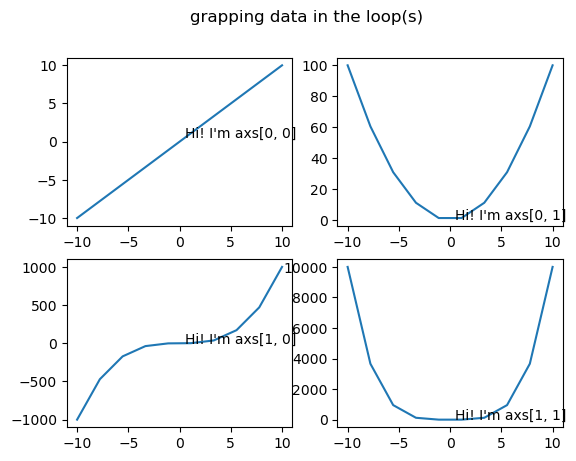

In [14]:
fig, axs = plt.subplots(ncols=2, nrows=2)

for row in range(2):
    for col in range(2):
        axs[row, col].plot(x, y[row][col])
        axs[row, col].text(0.5, 0.5, f'Hi! I\'m axs[{row}, {col}]')

fig.suptitle('grapping data in the loop(s)');

Now that we have all our plotting and annotating in one place, we can add or change things that will automatically affect all the plots. No need to copy and paste!

For example, you may have noticed above that the positions of our annotations got messed up. This is because the positions were set assuming that the x and y axes both went from 0 to 1, which is no longer true. But we can tell our annotation to use the zero-to-one coordinate system instead of using data coordinates by using the `transform` property that `artists` have.

We can also make all our plots light blue, just for the heck of it.

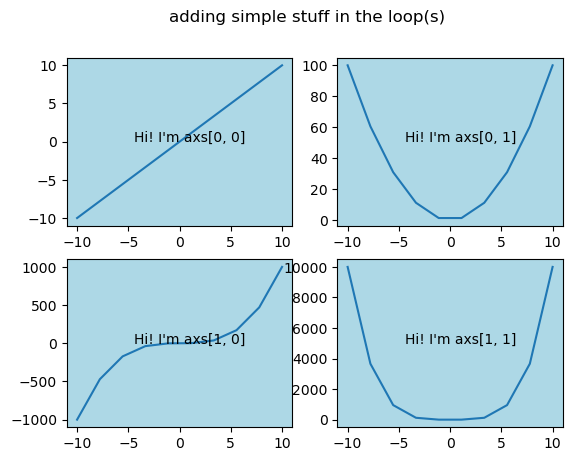

In [15]:
fig, axs = plt.subplots(ncols=2, nrows=2)

for row in range(2):
    for col in range(2):
        axs[row, col].plot(x, y[row][col])
        axs[row, col].text(0.3, 0.5, f'Hi! I\'m axs[{row}, {col}]', 
                           transform=axs[row, col].transAxes)        # tell the text to use 0-1 coords
        axs[row, col].set_facecolor('lightblue')
        
fig.suptitle('adding simple stuff in the loop(s)');

We can get even fancier by storing plot customizations like lines, markers, font sizes, etc. so that we can access them with our loop(s).

In [16]:
lspec = [['r:', 'b-o'], ['k--d', 'gs']]

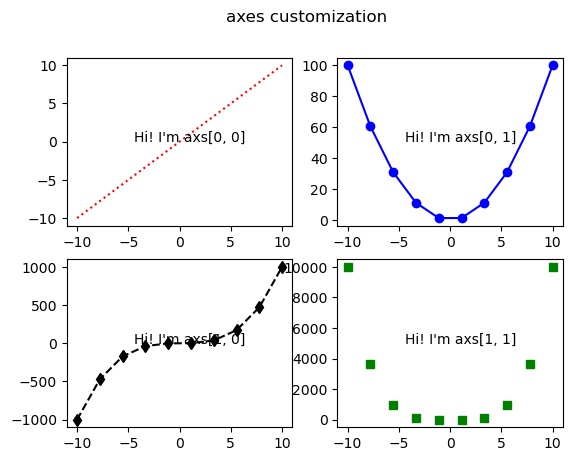

In [17]:
fig, axs = plt.subplots(ncols=2, nrows=2)

for row in range(2):
    for col in range(2):
        axs[row, col].plot(x, y[row][col], lspec[row][col])
        axs[row, col].text(0.3, 0.5, f'Hi! I\'m axs[{row}, {col}]', 
                           transform=axs[row, col].transAxes)
                           
fig.suptitle('axes customization');

---

In the code cell below, make something about the text (e.g. font size, color) different for each plot. Don't cheat: do it inside the for loops!

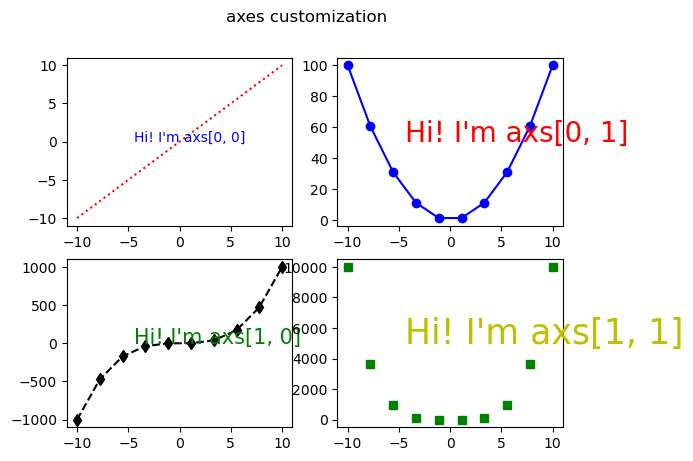

In [22]:
font_size = [[10,20],[15,25]]
font_color = [['b','r'],['g','y']]


fig, axs = plt.subplots(ncols=2, nrows=2)

for row in range(2):
    for col in range(2):
        axs[row, col].plot(x, y[row][col], lspec[row][col])
        axs[row, col].text(0.3, 0.5, f'Hi! I\'m axs[{row}, {col}]', 
                           transform=axs[row, col].transAxes,
                          size = font_size[row][col],
                          c = font_color[row][col])
                           
fig.suptitle('axes customization');

---

#### Making room for annotations

You can specify the overall size of the figure. We often want to make it larger than the default in order to make room for axis labels and suchlike.

There is also an option to set the layout of the figure to be "constrained" – this tries to adjust things so that everything fits in the figure without overlapping.

Here, we'll bump the figure size up and set the layout to "constrained" and take a look.

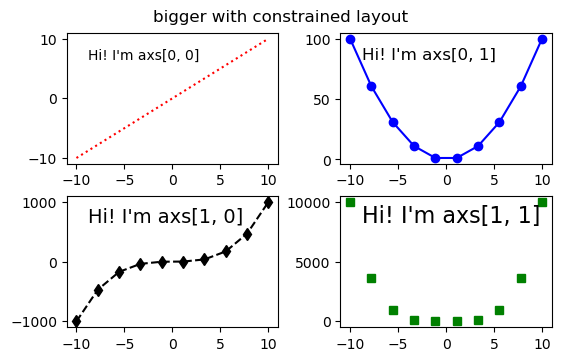

In [23]:
lspec = [['r:', 'b-o'], ['k--d', 'gs']]
fsizes = [[10, 12], [14, 16]]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5),
                        layout="constrained")
# add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].plot(x, y[row][col], lspec[row][col])
        axs[row, col].text(0.1, 0.8, f'Hi! I\'m axs[{row}, {col}]', 
                           transform=axs[row, col].transAxes,
                           fontsize = fsizes[row][col])

fig.suptitle('bigger with constrained layout');

#### Setting the aspect ratio of plots (and flat iteration)

Sometimes we want to set the aspect ratio (height/width) of plots ourselves. We might want the plots to be square, for example, so that the unit circle looks like a circle and not an ellipse.

Below, we'll set all the `axes` to have an aspect ratio of 1.0. Because we want to do exactly the same thing to every plot, we don't need to keep track of which row or column we are in, we just need to step through the plots. For these situations, the `axs` array created by `sub_plots()` can generate an iterator, `axs.flat`, that we can use with a single `loop` to go through our plots.

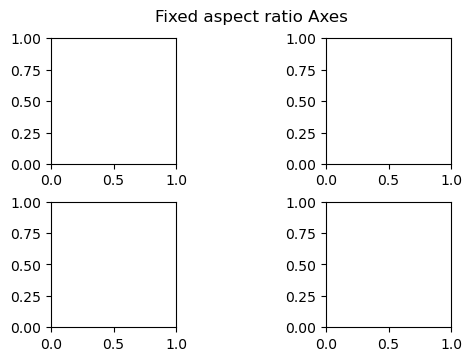

In [24]:
fig, axs = plt.subplots(2, 2, layout="constrained", figsize=(5.5, 3.5))

for ax in axs.flat:
    ax.set_aspect(1)

fig.suptitle('Fixed aspect ratio Axes');

#### Tightening up the layout

We can play around with the figure size to clean things up. In the code cell below, play around with the figure size to make a plot layout that has room, but not too much room, for annotations.

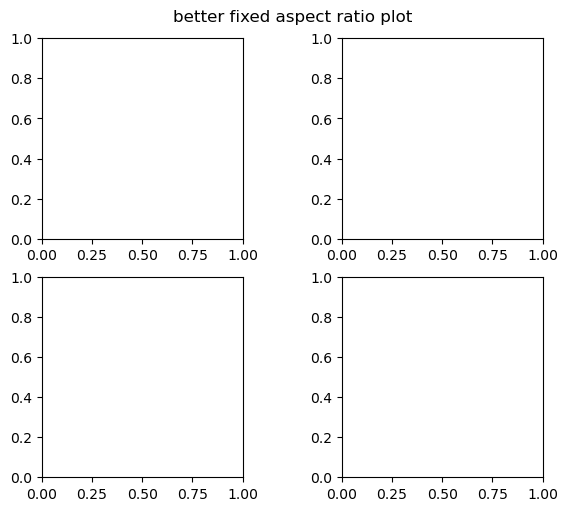

In [40]:
fig, axs = plt.subplots(2, 2, layout="constrained", figsize=(6, 5))

for ax in axs.flat:
    ax.set_aspect(1)

fig.suptitle('better fixed aspect ratio plot');

#### Setting a panel to blank

Sometimes we might not need one of our subplots. For example, what if want to show a scatter plot along with histograms of the x and y values? In this case, we can just turn of the `axis` objects for that `axes`:

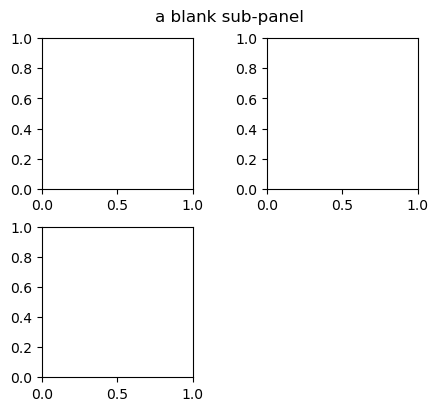

In [41]:
fig, axs = plt.subplots(2, 2, layout="constrained", figsize=(4.5, 4.0))

for ax in axs.flat:
    ax.set_aspect(1)

axs[1,1].axis('off')
fig.suptitle('a blank sub-panel');

---

### making a complete figure

Recycling some of the code from above, make a nice plot that shows the first four polynomials in four subplots. The figure should include x- and y-axis labels, titles for the subplots, etc. Tinker with it until looks nice and isn't cluttered. (Remember, you don't necessarily need axis labels for every subplot if some of them are redundant.

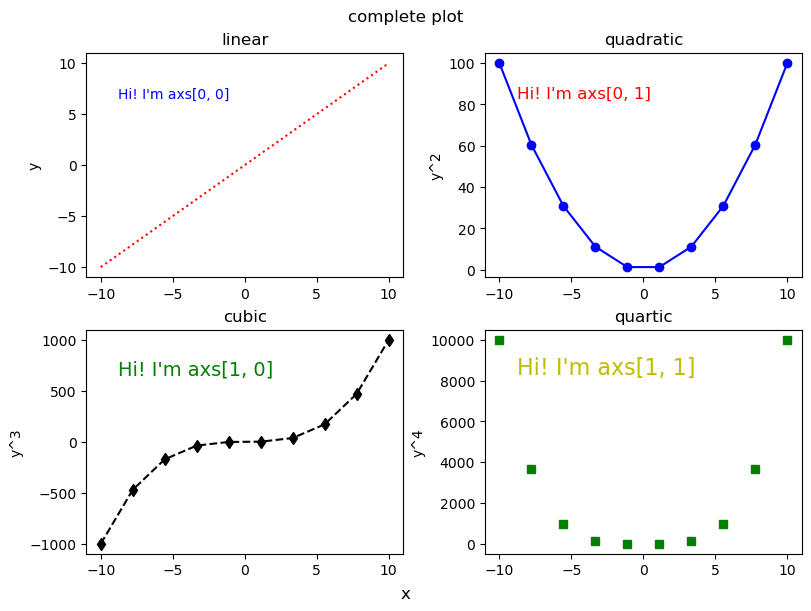

In [52]:
lspec = [['r:', 'b-o'], ['k--d', 'gs']]
fsizes = [[10, 12], [14, 16]]
font_color = [['b','r'],['g','y']]
y_label = [['y','y^2'],['y^3','y^4']]
sub_titles = [['linear', 'quadratic'],['cubic', 'quartic']]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8, 6),
                        layout="constrained")
# add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].plot(x, y[row][col], lspec[row][col])
        axs[row, col].text(0.1, 0.8, f'Hi! I\'m axs[{row}, {col}]', 
                           transform=axs[row, col].transAxes,
                           fontsize = fsizes[row][col],
                          c = font_color[row][col])
        axs[row, col].set_ylabel(y_label[row][col])
        axs[row, col].set_title(sub_titles[row][col])

fig.suptitle('complete plot');
fig.supxlabel('x');

---

## Adding subplots with `subplot_mosaic()`

While `subplots()` returns an array of `axes` objects that we address by indexing, `subplot_mosaic()` offers us an alternative that returns a Python *dict* that we address by its keys. 

We provide the dict keys we want to `subplot_mosaic()` in a Python list that specifies the plot layout we want.

Like this.

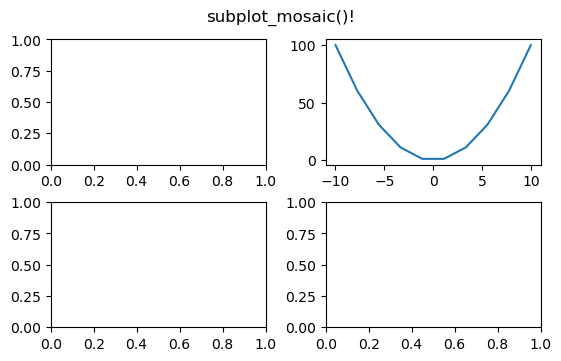

In [53]:
fig, axd = plt.subplot_mosaic([['line', 'parabola'],
                               ['cubic', 'quartic']],
                              figsize=(5.5, 3.5), layout="constrained")

axd['parabola'].plot(x, y2)
    
fig.suptitle('subplot_mosaic()!');

Note that here we named our dictionary of `axes` objects "`axd`". Let's look at it.

In [54]:
axd

{'line': <Axes: label='line'>,
 'parabola': <Axes: label='parabola'>,
 'cubic': <Axes: label='cubic'>,
 'quartic': <Axes: label='quartic'>}

So it contains the same sort of `axes` objects (the "AxesSubplot" things), but just in a dictionary instead of an array.

We can still loop through our plots to do stuff, but because the plots are addressed by name (key) instead of position (row and column), we can do it with a single loop.

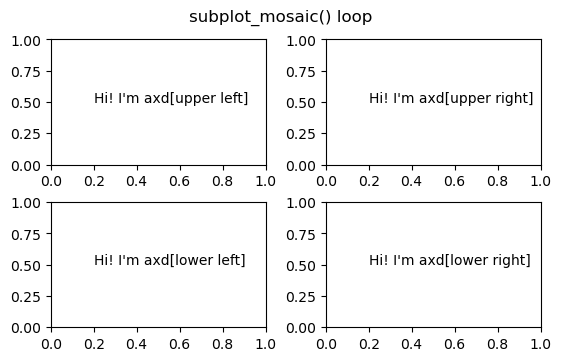

In [55]:
fig, axd = plt.subplot_mosaic([['upper left', 'upper right'],
                               ['lower left', 'lower right']],
                              figsize=(5.5, 3.5), layout="constrained")
for k in axd:
    axd[k].text(0.2, 0.5, f'Hi! I\'m axd[{k}]')
    
fig.suptitle('subplot_mosaic() loop');

---

In the code cell below, use `subplot_mosaic` and a `for` loop to make a figure with four plots (line through quartic), like the ones we made with `subplots()` above. 

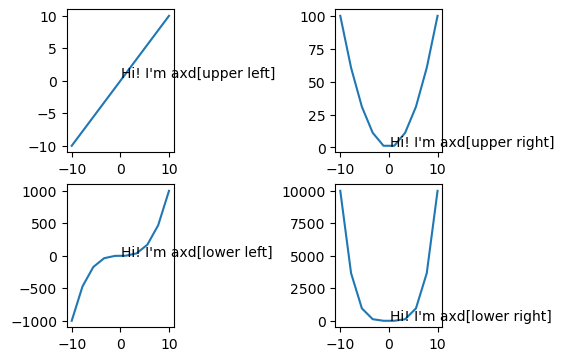

In [66]:
fig, axd = plt.subplot_mosaic([['upper left', 'upper right'],
                               ['lower left', 'lower right']],
                              figsize=(5.5, 3.5), layout="constrained")
data = {'upper left':y1, 'upper right':y2, 'lower left':y3, 'lower right':y4}

for k in axd:
    axd[k].text(0.2, 0.5, f'Hi! I\'m axd[{k}]')
    axd[k].plot(x, data[k])

(hint: you'll need to change the way the data are stored)

---

### Making fancier layouts with `subplot_mosaic`

A really great thing about using `subplot_mosaic()` is that we can have a single subplot span multiple rows or columns of the figure just by naming them accordingly:

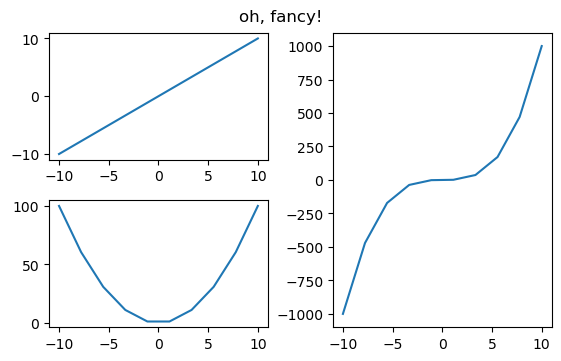

In [63]:
datad = {'line': y1, 'parabola': y2, 'cubic': y3}        # dictionary for accessing data

fig, axd = plt.subplot_mosaic([['line', 'cubic'],        # make 'cubic' span rows of right column
                               ['parabola', 'cubic']],
                              figsize=(5.5, 3.5), layout="constrained")
for k in axd:
    axd[k].plot(x, datad[k])

fig.suptitle('oh, fancy!');

### Finer control with a grid specification (gridspec)

We can have finer control over our rows and columns using a "grid specification". Using `subplot_mosaic()`, we can specify some details of the figure layout using the optional `gridspec_kw` argument. This argument takes a dictionary that allows us to specify the relative sizes of the rows and columns and the spacing between them.

In the example below, we'll make left column and the top row relatively small:

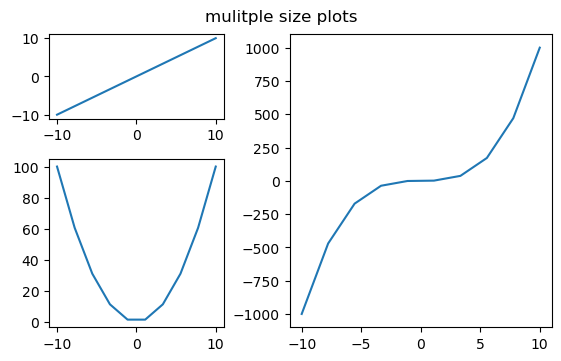

In [67]:
datad = {'line': y1, 'parabola': y2, 'cubic': y3}

gs_kw = dict(width_ratios=[1, 1.5], height_ratios=[1, 2]) # dict to set relative sizes of cols and rows

fig, axd = plt.subplot_mosaic([['line', 'cubic'],
                               ['parabola', 'cubic']],
                              gridspec_kw=gs_kw,         # passing the dict to subplot_mosaic
                              figsize=(5.5, 3.5), 
                              layout="constrained")

for k in axd:
    axd[k].plot(x, datad[k])

fig.suptitle('mulitple size plots');

Each number in the xxx_ratios entry is the size of a row or column relative to the total height or width of the figure. So, in the example above, the top row is 1/3 of the figure and the bottom row is 2/3.

Crucially, we can also specify the amount of spacing between the rows and columns (to make room for labels, etc.).

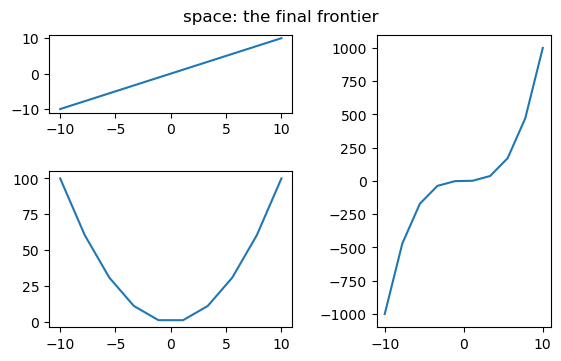

In [68]:
datad = {'line': y1, 'parabola': y2, 'cubic': y3}

gs_kw = dict(width_ratios=[1.4, 1], 
             height_ratios=[1, 2],
             wspace=0.1, hspace=0.1)                   # spacing between the rows and cols

fig, axd = plt.subplot_mosaic([['line', 'cubic'],
                               ['parabola', 'cubic']],
                              gridspec_kw=gs_kw, 
                              figsize=(5.5, 3.5), 
                              layout="constrained")

for k in axd:
    axd[k].plot(x, datad[k])
    

fig.suptitle('space: the final frontier');

---

In the cell below, improve the figure above with annotations (axis labels, etc.)

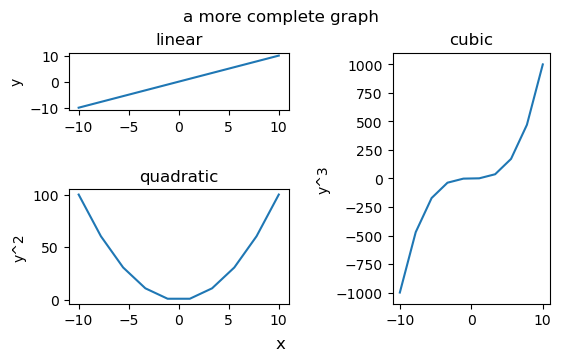

In [76]:
datad = {'line': y1, 'parabola': y2, 'cubic': y3}
ylabeld = {'line': 'y', 'parabola': 'y^2', 'cubic': 'y^3'}
plot_titles = {'line': 'linear', 'parabola': 'quadratic', 'cubic': 'cubic'}

gs_kw = dict(width_ratios=[1.4, 1], 
             height_ratios=[1, 2],
             wspace=0.1, hspace=0.1)                   

fig, axd = plt.subplot_mosaic([['line', 'cubic'],
                               ['parabola', 'cubic']],
                              gridspec_kw=gs_kw, 
                              figsize=(5.5, 3.5), 
                              layout="constrained")

for k in axd:
    axd[k].plot(x, datad[k])
    axd[k].set_ylabel(ylabeld[k])
    axd[k].set_title(plot_titles[k])
    

fig.suptitle('a more complete graph');
fig.supxlabel('x');

---

### Adding individual subplots with a gridspec (optional)

Finally, we can add subfigures manually by 

* making a figure
* adding a gridspec to the figure
* adding plots by specifying their locations on the gridspec using numpy indexing

This "low level" method is actually what happens behind the curtain when we specify a `gridspec_kw` argument as we did above.

Here's an example:

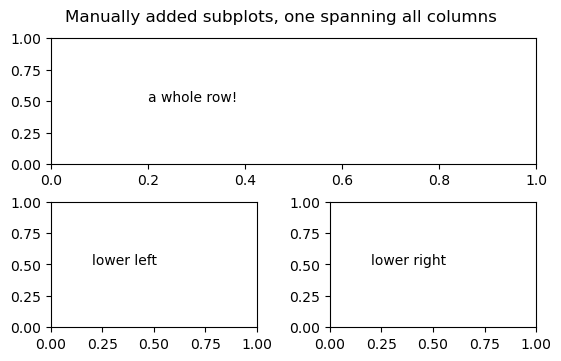

In [77]:
fig = plt.figure(figsize=(5.5, 3.5), layout="constrained")  # make a figure
spec = fig.add_gridspec(2, 2)                               # specify the grid of subplots

ax0 = fig.add_subplot(spec[0, :])                           # a subplot spanning the whole first row
ax0.text(0.2, 0.5, "a whole row!")

ax10 = fig.add_subplot(spec[1, 0])
ax10.text(0.2, 0.5, "lower left")

ax11 = fig.add_subplot(spec[1, 1])
ax11.text(0.2, 0.5, "lower right")

fig.suptitle('Manually added subplots, one spanning all columns');

We can also specify the heights, widths, spacing, etc. in the call to `fig.add_gridspec()`. 